# Heres a few examples using the data and code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import os
import matplotlib.cm as cm
%matplotlib notebook

#### trainsC is a class which contains all of the data, with getters to access it, and some plotting functionality. All of our optimization algorithms use the data in this format only.

In [3]:
from load_matlab import *
trainsC = Trains(emg=4, clean_thresh=0.05, verbose=False)

### We can plot all single pulses

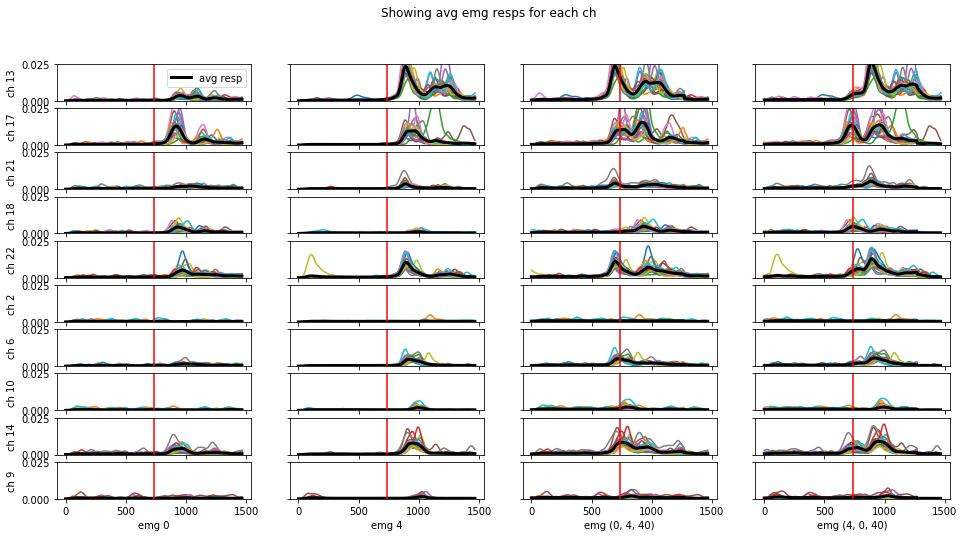

In [4]:
plt.rcParams['figure.figsize'] = [16, 8]
trainsC.plot_ch2emg_resps(chs=trainsC.chs, emgs=[0,4,(0,4,40),(4,0,40)])

### Or double pulses

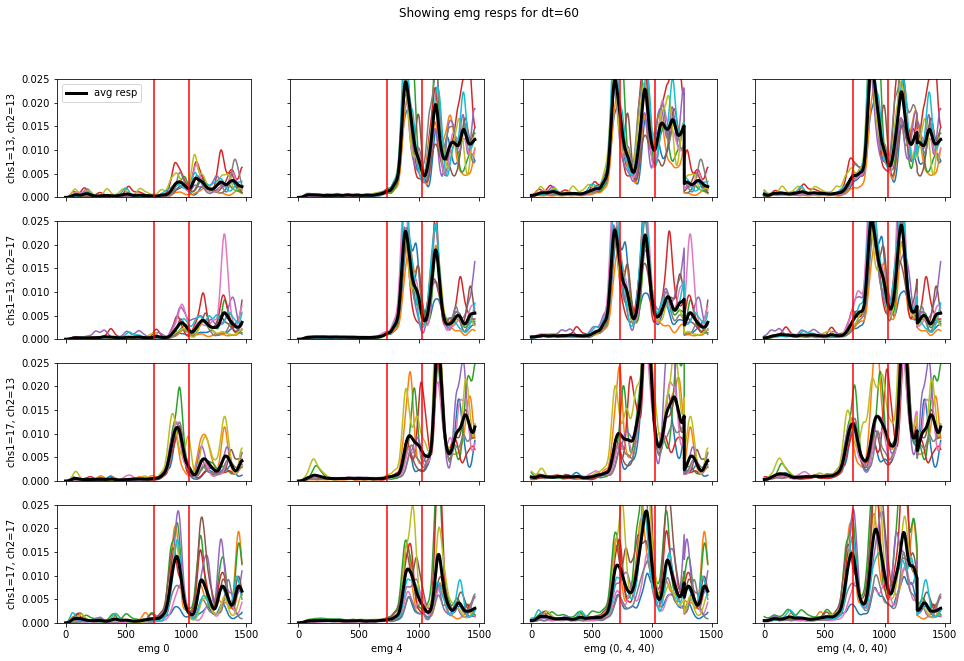

In [5]:
plt.rcParams['figure.figsize'] = [16, 10]
trainsC.plot_chs2emg_resps(chs1=[13,17],chs2=[13,17],dts=60,emgs=[0,4,(0,4,40),(4,0,40)])

### Or all respones for the double-event stimulation space (as in the paper)

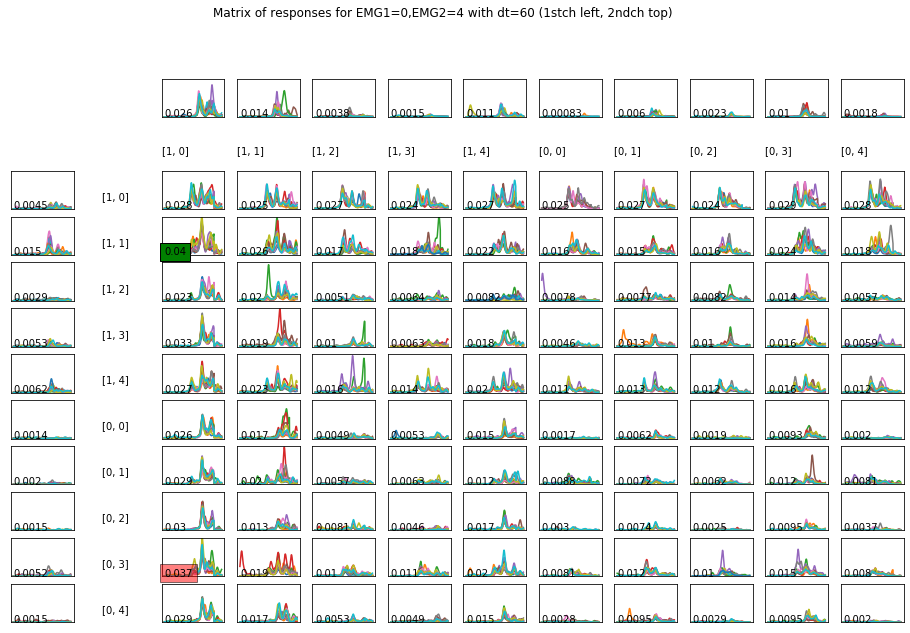

In [6]:
plt.rcParams['figure.figsize'] = [16, 10]
trainsC.plot_response_matrix(syn=(0,4), dt=60)

## We can train GPs on these spaces.

### We start with the single-event GP

In [15]:
import sys
# Jupyter needs to find GPy. Change this path to where you installed GPy
sys.path.insert(0, '/Users/samlaf/programming/GPy')
import GPy
from gp_full_1d import *

reconstraining parameters Mat52.lengthscale


Optimization restart 1/3, f = -803.0893396276614
Optimization restart 2/3, f = -803.0893369143266
Optimization restart 3/3, f = -803.0893369142588


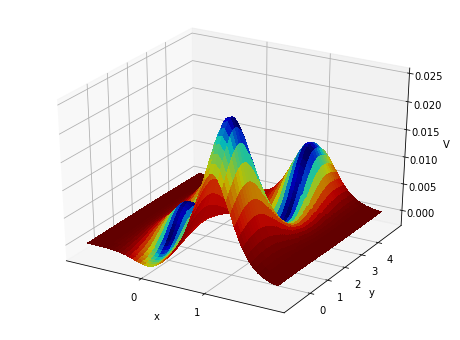

In [18]:
X,Y = make_dataset_1d(trainsC, emg=4)
m = train_model_1d(X,Y)
plt.rcParams['figure.figsize'] = [8, 6]
plot_model_surface(m, plot_data=False, plot_colorbar=False)
plt.show()